
# Introduction
## This dataset contains Olympic medalist data from 2008. Initially, it is messy and requires cleaning. Below, we examine its structure before tidying.


#### Set-up

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
import os
print(os.listdir()) 

['.DS_Store', 'TidyData_Project', 'TidyData-Project.ipynb', 'basic-streamlit-app', 'olympics_08_medalists.csv', 'README.md', '.ipynb_checkpoints', '.git']


#### Loading and Inspecting Data

In [51]:
file_path = 'olympics_08_medalists.csv'
df = pd.read_csv(file_path)
display(df.head())
print("Let's fix it!")


,medalist_name,male_archery,female_archery,male_athletics,female_athletics,male_badminton,female_badminton,male_baseball,male_basketball,female_basketball,...,female_beach volleyball,male_volleyball,female_volleyball,male_water polo,female_water polo,male_weightlifting,female_weightlifting,male_freestyle wrestling,female_freestyle wrestling,male_greco-roman wrestling
0,Aaron Armstrong,NaN,NaN,gold,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aaron Peirsol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Abdullo Tangriev,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Abeer Abdelrahman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,bronze,NaN,NaN,NaN
4,Abhinav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's fix it!


#### Loading and Inspecting Data cont...

In [90]:
print("\nData, Column, etc Dataset Info:\n")
display(df.info())



Data, Column, etc Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1875 entries, 0 to 1874
Data columns (total 71 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   medalist_name                 1875 non-null   object
 1   male_archery                  11 non-null     object
 2   female_archery                9 non-null      object
 3   male_athletics                85 non-null     object
 4   female_athletics              81 non-null     object
 5   male_badminton                12 non-null     object
 6   female_badminton              10 non-null     object
 7   male_baseball                 72 non-null     object
 8   male_basketball               35 non-null     object
 9   female_basketball             36 non-null     object
 10  male_boxing                   44 non-null     object
 11  male_canoeing and kayaking    53 non-null     object
 12  female_canoeing and kayaking  21 non-null 

None

#### Loading and Inspecting Data cont...


In [92]:
print("\nBelow are Missing Values in the Dataset:\n")
print(df.isnull().sum())


Below are Missing Values in the Dataset:

medalist_name                    0
male_archery                  1864
female_archery                1866
male_athletics                1790
female_athletics              1794
                              ... 
male_weightlifting            1851
female_weightlifting          1854
male_freestyle wrestling      1847
female_freestyle wrestling    1859
male_greco-roman wrestling    1848
Length: 71, dtype: int64


## Tidying Data

## Reshaping the dataset to follow tidy data principles

id_vars = "medalist_name" → These are the unique identifiers that stay fixed.
var_name = "Event_Gender" → This column combines the event type and gender.
value_name = "Medal" → This contains the medal type for each observation.

In [58]:
#resharping and organizing data
#id_vars = names
#values = medal type, gender, sport/event
#observations = each individual
df_tidy = (
    df
    .drop_duplicates()
    .melt(id_vars=["medalist_name"], 
        var_name="Event_Gender", 
        value_name="Medal")
    
)

# Remove empty values 
df_tidy = df_tidy.dropna()

df_tidy = df_tidy[df_tidy["Medal"] != ""]
#Removed EMPTY SPACES, particularly for medals since not every medalist received an award for every event

# Make event and gender own variables; Separate Event and Gender instead of doing str.split and str.replace
df_tidy[['Gender', 'Sport']] = df_tidy["Event_Gender"].str.extract(r'(\w+)_(.+)')

# Reorder and clean columns
df_tidy = df_tidy[['medalist_name', 'Sport', 'Gender', 'Medal']].sort_values(by=["Sport", "Medal"])
medal_order = ["bronze", "silver", "gold"]
df_tidy["Medal"] = pd.Categorical(df_tidy["Medal"], categories=medal_order, ordered=True)
df_tidy = df_tidy.sort_values(by=["Sport", "Medal"])

# Save cleaned dataset
df_tidy.to_csv("tidy_olympics_08_medalists.csv", index=False)

df_tidy.head()
df_tidy = df_tidy.sort_values(by=["Sport", "Medal"])

# Save cleaned dataset
df_tidy.to_csv("tidy_olympics_08_medalists.csv", index=False)

df_tidy.head()



,medalist_name,Sport,Gender,Medal
177,Bair Badënov,archery,male,bronze
760,Jiang Lin,archery,male,bronze
950,Li Wenquan,archery,male,bronze
1768,Xue Haifeng,archery,male,bronze
2124,Bérengère Schuh,archery,female,bronze


### Variables need to have their own column
#### Our Variables: 1. Sport/Event, 2. Medal Tyle, 3. Gender

In [94]:
print("Below is a comparison of the components that used to make up the dataset before and after tidying.")
print("Before: ")
df.info()
print("\nAfter: ")
df_tidy.info()


Below is a comparison of the components that used to make up the dataset before and after tidying.
Before: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1875 entries, 0 to 1874
Data columns (total 71 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   medalist_name                 1875 non-null   object
 1   male_archery                  11 non-null     object
 2   female_archery                9 non-null      object
 3   male_athletics                85 non-null     object
 4   female_athletics              81 non-null     object
 5   male_badminton                12 non-null     object
 6   female_badminton              10 non-null     object
 7   male_baseball                 72 non-null     object
 8   male_basketball               35 non-null     object
 9   female_basketball             36 non-null     object
 10  male_boxing                   44 non-null     object
 11  male_canoeing and kayaking

# Visuals

## Visualization 1: Medals won by each Sport

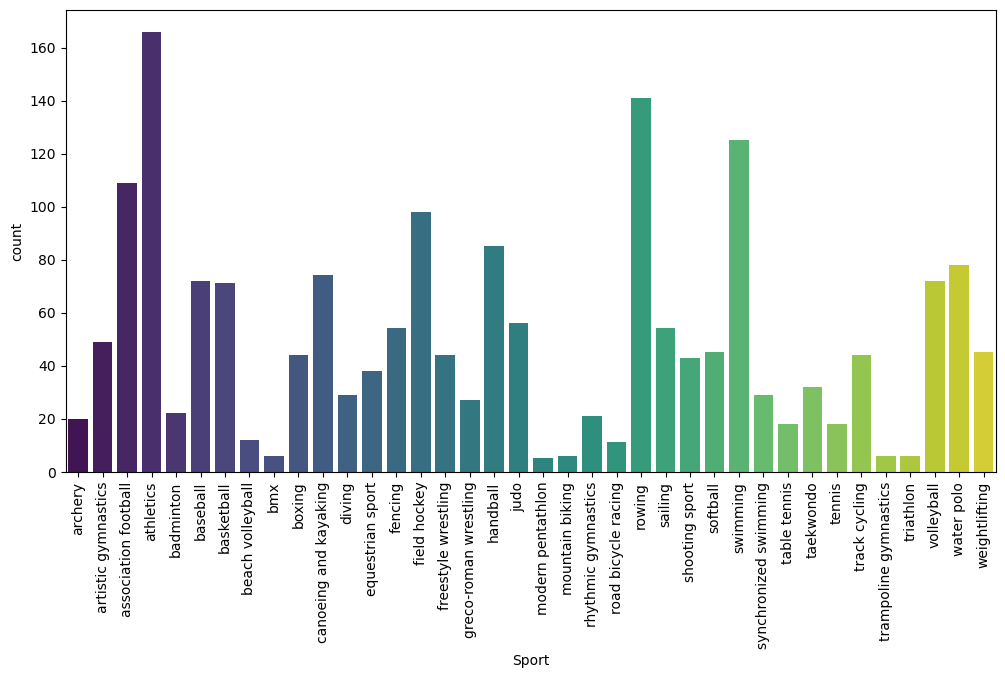

In [63]:
plt.figure(figsize=(12,6)) 
sns.countplot(x='Sport', data=df_tidy, palette='viridis')
plt.xticks(rotation=90)  # Rotate labels for readability
plt.show()

## Visualization 2: Medal Distribution by Gender

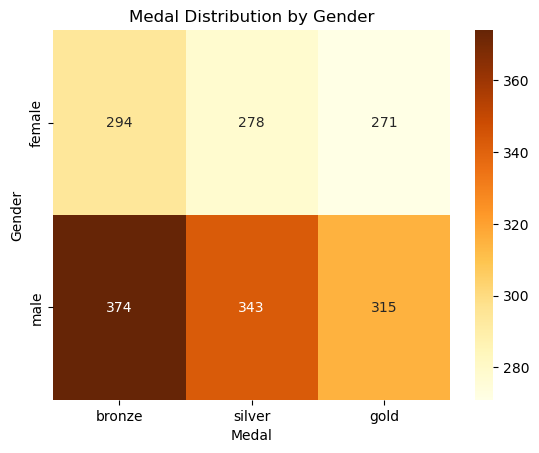

In [98]:
heatmap_data = df_tidy.pivot_table(index="Gender", columns="Medal", aggfunc="size", fill_value=0)

sns.heatmap(heatmap_data, annot=True, cmap="YlOrBr", fmt="d")
plt.title("Medal Distribution by Gender")
plt.show()


## Visualization 3: Number of Medals per Sport

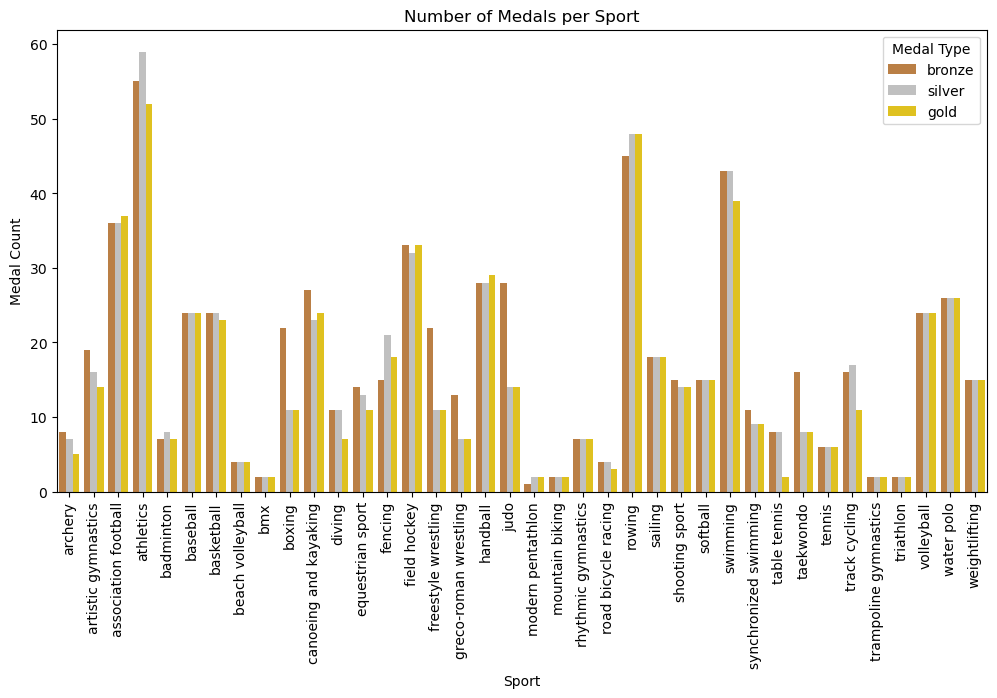

In [67]:
plt.figure(figsize=(12,6)) 
sns.countplot(x="Sport", hue="Medal", data=df_tidy, 
              palette={"bronze": "#CD7F32", "silver": "#C0C0C0", "gold": "#FFD700"})
plt.xticks(rotation=90)  # Rotate labels for readability
plt.xlabel("Sport")
plt.ylabel("Medal Count")
plt.title("Number of Medals per Sport")
plt.legend(title="Medal Type")
plt.show()



### Pivot Table


In [69]:
pivot_table = df_tidy.pivot_table(
    index="Sport",       # Rows (Index)
    columns="Gender",    # Columns (Grouping by Gender)
    values="Medal",      # The value being aggregated
    aggfunc="count",     # Aggregation function (counting medals)
    fill_value=0         # Fill NaNs with 0
)


print("Pivot table of metals obtained by male and female atheltes!")
print(pivot_table)
#pivot_table

Pivot table of metals obtained by male and female atheltes!
Gender                 female  male
Sport                              
archery                     9    11
artistic gymnastics        20    29
association football       54    55
athletics                  81    85
badminton                  10    12
baseball                    0    72
basketball                 36    35
beach volleyball            6     6
bmx                         3     3
boxing                      0    44
canoeing and kayaking      21    53
diving                     13    16
equestrian sport           20    18
fencing                    26    28
field hockey               48    50
freestyle wrestling        16    28
greco-roman wrestling       0    27
handball                   42    43
judo                       28    28
modern pentathlon           2     3
mountain biking             3     3
rhythmic gymnastics        21     0
road bicycle racing         6     5
rowing                     58    83
sail

### The stark contrasts can be seen in the heatmap below!

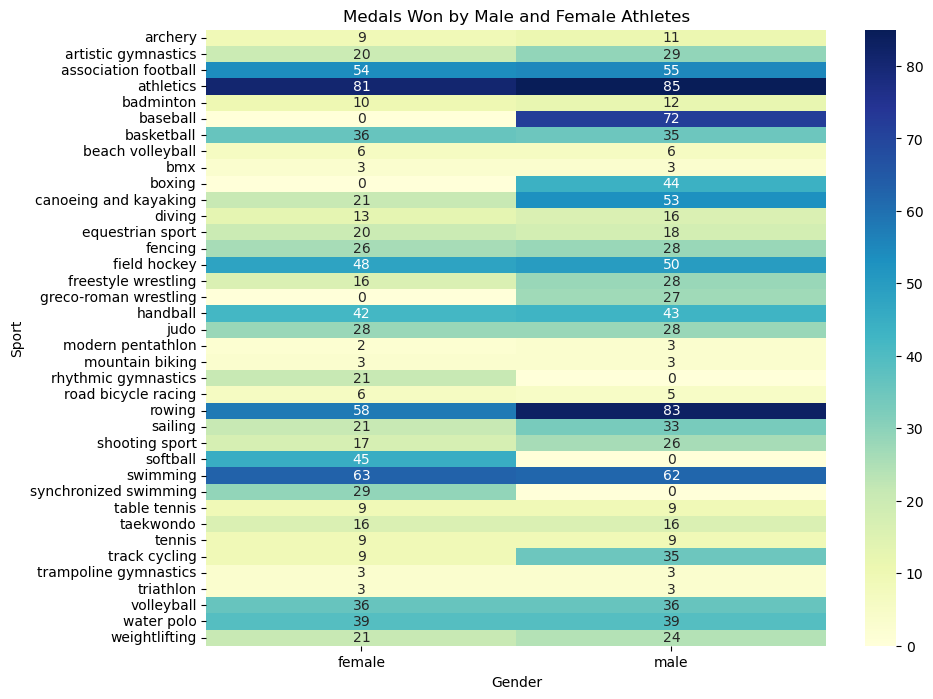

In [104]:
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Medals Won by Male and Female Athletes")
plt.ylabel("Sport")
plt.xlabel("Gender")
plt.show()


# _Exploratory Data Analysis_

In [71]:
print("Descibing our dataset")
df_tidy.describe()

Descibing our dataset


,medalist_name,Sport,Gender,Medal
count,1875,1875,1875,1875
unique,1875,38,2,3
top,Bair Badënov,athletics,male,bronze
freq,1,166,1032,668


In [72]:
'''
Basic Exploratory Data Analysis
'''
print("Since there are a total of 187 medalist names counted and 187 unique medalist names, we can confirm that there are no duplicates.")
print("\nThe heat graph shows that there were more bronze medals awarded than silver or gold. \nAlso, the heatmap demonstrates that overall, there were more medals distributed to males than females.")
print("\nThe visualizations show that there were more medals given in the athletics sport with the most gold, silver, and bronze than any other sport with more than 50 medals each!")


Since there are a total of 187 medalist names counted and 187 unique medalist names, we can confirm that there are no duplicates.

The heat graph shows that there were more bronze medals awarded than silver or gold. 
Also, the heatmap demonstrates that overall, there were more medals distributed to males than females.

The visualizations show that there were more medals given in the athletics sport with the most gold, silver, and bronze than any other sport with more than 50 medals each!
